# Quiz 2

In [9]:
import numpy as np 
import scipy.stats as sts
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion


import matplotlib.pyplot as plt
%matplotlib inline

## Question 2

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [2]:
n = 50
maya_genes = np.zeros(n)
maya_genes[np.random.randint(n)] = 1
maya_genes

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
maya_interval = proportion_confint(sum(maya_genes), nobs=n, method = 'normal')

In [4]:
print("interval [%.4f,%.4f]" %(maya_interval[0],maya_interval[1]))
print("lenght %f" % (maya_interval[1] - maya_interval[0]))

interval [0.0000,0.0588]
lenght 0.058805


In [10]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [11]:
my_proportion_confint(sum(maya_genes), n)

(-0.018805307081790987, 0.05880530708179099)

## Question 3

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.  

In [5]:
wilson_interval = proportion_confint(sum(maya_genes), nobs=n, method = 'wilson')
print("wilson interval [%.4f,%.4f]" %(wilson_interval[0],wilson_interval[1]))

wilson interval [0.0035,0.1050]


## Question 5
Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01\pm0.01±0.01 на уровне доверия 95%?

In [15]:
n_samples = int(np.ceil(samplesize_confint_proportion(maya_genes.mean(), 0.01)))
n_samples

753

## Question 6

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком ppp, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?  

In [19]:
proportion = np.linspace(0, 1, 200)
n_samples = np.zeros((proportion.shape))

In [21]:
for i, p in enumerate(proportion):
    n_samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.01)))

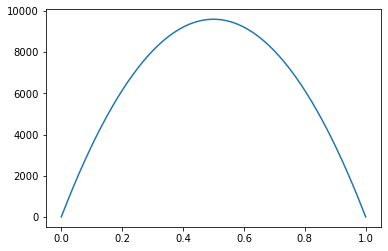

In [22]:
plt.plot(proportion, n_samples)

In [25]:
n_samples.max()

9604.0